In [1]:
import os
import requests
import zipfile

# Define dataset URL and file paths
dataset_url = "https://www.cs.ucsb.edu/~william/data/liar_dataset.zip"
data_dir = os.path.join(os.pardir, "data")
zip_path = os.path.join(data_dir, "liar_dataset.zip")
train_file = os.path.join(data_dir, "train.tsv")
test_file = os.path.join(data_dir, "test.tsv")

# Ensure the data directory exists
os.makedirs(data_dir, exist_ok=True)

# Check if files already exist
if not os.path.exists(train_file) or not os.path.exists(test_file):
    print("Downloading the dataset...")
    # Download the dataset
    response = requests.get(dataset_url, stream=True)
    with open(zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download complete.")

    # Extract the dataset
    print("Extracting the dataset...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(data_dir)
    print("Extraction complete.")

    # Clean up the zip file
    os.remove(zip_path)
    print(f"Dataset prepared in '{data_dir}'.")
else:
    print("Dataset already exists. Skipping download.")

Dataset already exists. Skipping download.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and testing data
train_df = pd.read_csv(train_file, sep='\t', header=None)
test_df = pd.read_csv(test_file, sep='\t', header=None)

# Assign column names based on the dataset description
column_names = [
    'ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Speaker Job Title',
    'State Info', 'Party Affiliation', 'Barely True Counts', 'False Counts',
    'Half True Counts', 'Mostly True Counts', 'Pants on Fire Counts', 'Context'
]

train_df.columns = column_names
test_df.columns = column_names

# Preview the training data
train_df.head()

,ID,Label,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


# Data Preparation

## Check for missing values

In [3]:
print(train_df.isnull().sum())

ID                         0
Label                      0
Statement                  0
Subject                    2
Speaker                    2
Speaker Job Title       2898
State Info              2210
Party Affiliation          2
Barely True Counts         2
False Counts               2
Half True Counts           2
Mostly True Counts         2
Pants on Fire Counts       2
Context                  102
dtype: int64


In [4]:
# exclude the two data points with too many NaN values 
train_df[train_df.isnull().sum(axis=1)>2]

,ID,Label,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context
921,10439.json,mostly-true,Assault weapons and handguns are allowed in th...,guns,virginia-house-democratic-caucus,NaN,NaN,democrat,0.0,0.0,0.0,1.0,0.0,NaN
1137,280.json,mostly-true,"The church Barack Obama belongs to has a ""nonn...",religion,chain-email,NaN,NaN,none,11.0,43.0,8.0,5.0,105.0,NaN
1274,298.json,false,"Obama ""remains silent"" and ""is never asked how...",religion,chain-email,NaN,NaN,none,11.0,43.0,8.0,5.0,105.0,NaN
1459,269.json,pants-fire,"The Mormon religion has ""a plan that will see ...",religion,freedom-defense-advocates,NaN,NaN,none,0.0,0.0,0.0,0.0,1.0,NaN
2142,638.json,false,The fact is that although we have had a presid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2855,296.json,mostly-true,Barack Obama's church gave a lifetime achievem...,religion,chain-email,NaN,NaN,none,11.0,43.0,8.0,5.0,105.0,NaN
3105,221.json,pants-fire,An anonymous e-mail says that Hillary Clinton ...,economy,chain-email,NaN,NaN,none,11.0,43.0,8.0,5.0,105.0,NaN
3893,5915.json,false,The Georgia Regional Transportation Authority ...,transportation,transportation-leadership-coalition,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,NaN
3916,142.json,mostly-true,"Mitt Romney has ""a pro-choice record.""",abortion,log-cabin-republicans,NaN,NaN,none,0.0,0.0,0.0,2.0,0.0,NaN
4291,7228.json,false,On same-sex marriage,"civil-rights,gays-and-lesbians,marriage",kasim-reed,NaN,NaN,democrat,1.0,0.0,5.0,7.0,1.0,NaN


In [5]:
train_df = train_df[train_df.isnull().sum(axis=1)<=3].copy()

In [6]:
print(test_df.isnull().sum())

ID                        0
Label                     0
Statement                 0
Subject                   0
Speaker                   0
Speaker Job Title       325
State Info              262
Party Affiliation         0
Barely True Counts        0
False Counts              0
Half True Counts          0
Mostly True Counts        0
Pants on Fire Counts      0
Context                  17
dtype: int64


## Fill missing values with 'unknown' for categorical variables

In [7]:
categorical_column_names = train_df.select_dtypes(include=['object']).columns.tolist()
train_df[categorical_column_names] = train_df[categorical_column_names].fillna('unknown')
test_df[categorical_column_names] = test_df[categorical_column_names].fillna('unknown')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10238 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10238 non-null  object 
 1   Label                 10238 non-null  object 
 2   Statement             10238 non-null  object 
 3   Subject               10238 non-null  object 
 4   Speaker               10238 non-null  object 
 5   Speaker Job Title     10238 non-null  object 
 6   State Info            10238 non-null  object 
 7   Party Affiliation     10238 non-null  object 
 8   Barely True Counts    10238 non-null  float64
 9   False Counts          10238 non-null  float64
 10  Half True Counts      10238 non-null  float64
 11  Mostly True Counts    10238 non-null  float64
 12  Pants on Fire Counts  10238 non-null  float64
 13  Context               10238 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.2+ MB


# EDA

In [8]:
df = pd.concat([train_df, test_df])

## Analyze label distribution

Label
half-true      2379
false          2242
mostly-true    2203
true           1884
barely-true    1866
pants-fire      931
Name: count, dtype: int64


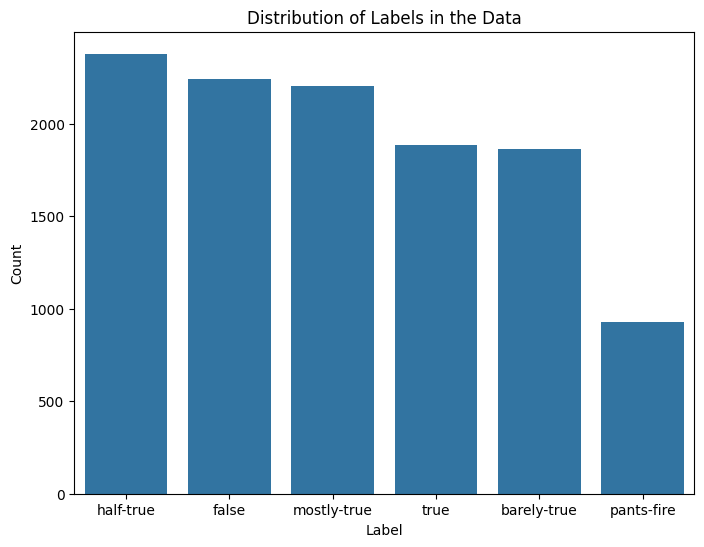

In [9]:
label_counts = df['Label'].value_counts()
print(label_counts)

# Plot label distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Label', data=df, order=label_counts.index)
plt.title('Distribution of Labels in the Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Analyze statement lengths

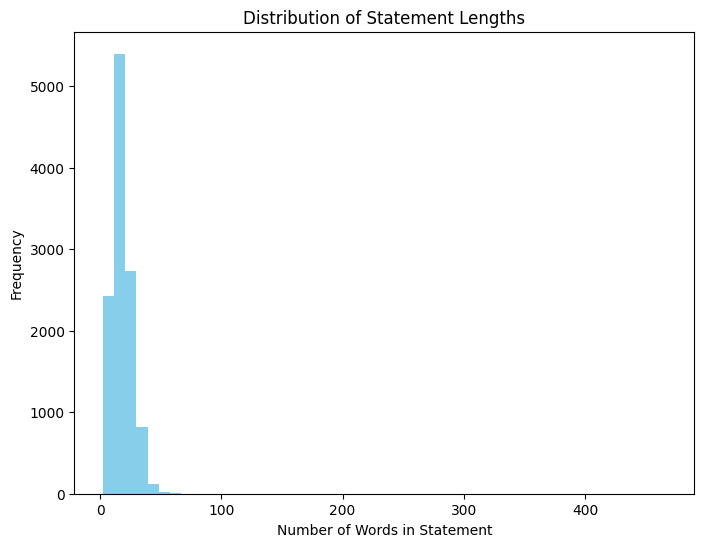

In [10]:
df['NumWords'] = df['Statement'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,6))
plt.hist(df['NumWords'], bins=50, color='skyblue')
plt.title('Distribution of Statement Lengths')
plt.xlabel('Number of Words in Statement')
plt.ylabel('Frequency')
plt.show()

## Analyze List of Subjects

In [11]:
from collections import Counter

# Flatten the list of subjects
all_subjects = [subject for sublist in df['Subject'].dropna().apply(lambda x: x.split(',')) for subject in sublist]

# Count occurrences of each subject
subject_counts = Counter([subject.strip() for subject in all_subjects])

# Convert to DataFrame for visualization
subject_df = pd.DataFrame(subject_counts.items(), columns=['Subject', 'Count']).sort_values(by='Count', ascending=False)
subject_df

,Subject,Count
6,economy,1296
5,health-care,1256
24,taxes,1104
17,federal-budget,839
8,education,822
...,...,...
140,death-penalty,2
139,homeless,1
141,fires,1
142,nightlife,1


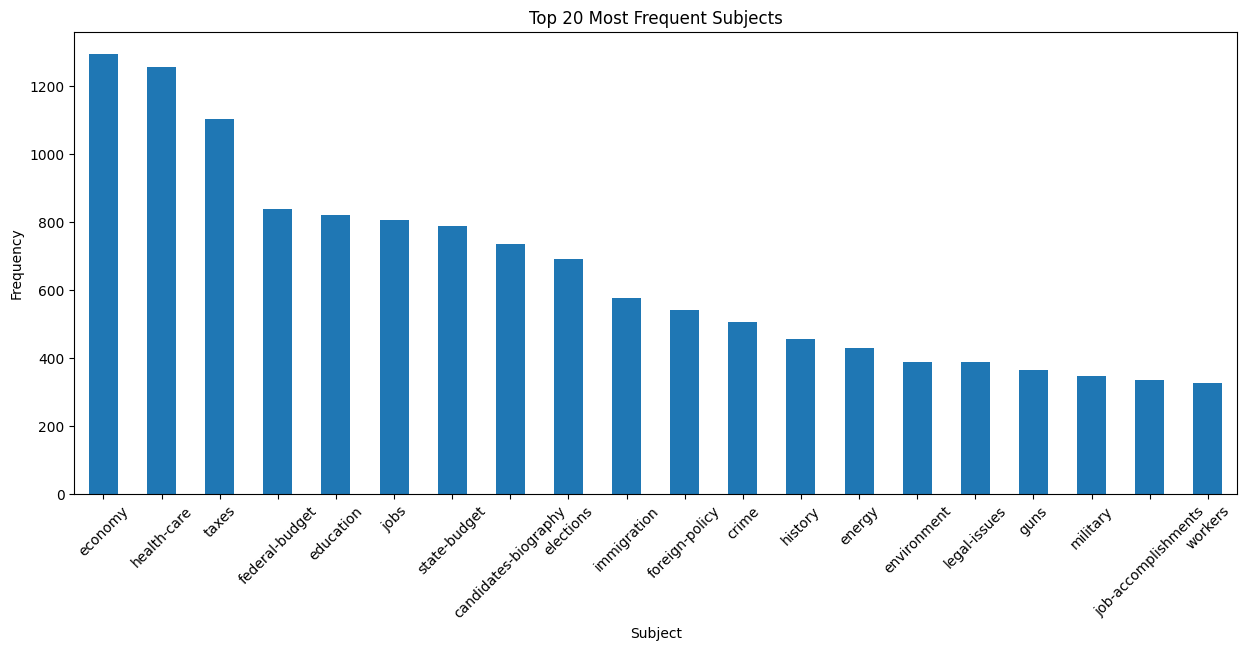

In [12]:
# Plot the top 20 most frequent subjects
subject_df.head(20).plot(kind='bar', x='Subject', y='Count', legend=False, figsize=(15,6))
plt.title('Top 20 Most Frequent Subjects')
plt.ylabel('Frequency')
plt.xlabel('Subject')
plt.xticks(rotation=45)
plt.show()

In [13]:
num_subjects = len(subject_df)
rare_subjects = set(subject_df[subject_df.Count < 100].Subject)
num_rare_subjects = len(rare_subjects)
print(f'removed {num_rare_subjects} out of {num_subjects} subjects: {num_rare_subjects/num_subjects:.2f}%')
rare_subjects

removed 81 out of 144 subjects: 0.56%


{'10-news-tampa-bay',
 'Alcohol',
 'afghanistan',
 'after-the-fact',
 'agriculture',
 'animals',
 'autism',
 'bankruptcy',
 'baseball',
 'bipartisanship',
 'bush-administration',
 'campaign-advertising',
 'cap-and-trade',
 'census',
 'china',
 'city-budget',
 'colbert-report',
 'congressional-rules',
 'consumer-safety',
 'county-budget',
 'county-government',
 'death-penalty',
 'debates',
 'disability',
 'diversity',
 'ebola',
 'fake-news',
 'fires',
 'florida',
 'florida-amendments',
 'food',
 'food-safety',
 'gambling',
 'gas-prices',
 'homeless',
 'housing',
 'human-rights',
 'hunger',
 'infrastructure',
 'islam',
 'israel',
 'kagan-nomination',
 'lottery',
 'marijuana',
 'marriage',
 'medicaid',
 'message-machine-2014',
 'natural-disasters',
 'new-hampshire-2012',
 'nightlife',
 'nuclear',
 'obama-birth-certificate',
 'occupy-wall-street',
 'oil-spill',
 'patriotism',
 'pensions',
 'politifacts-top-promises',
 'pop-culture',
 'population',
 'privacy',
 'public-service',
 'recreatio

## Distribution of Speakers


Number of unique Speakers: 3103


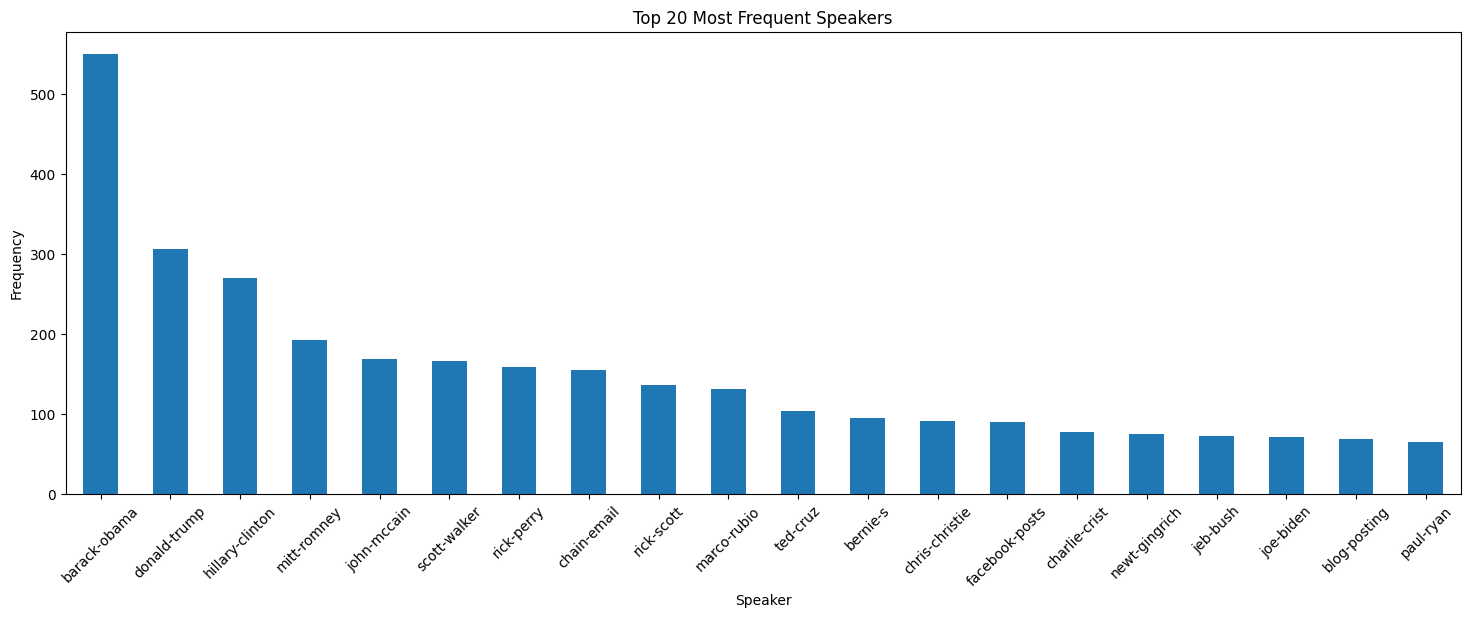

In [14]:
# Frequency
# Number of unique speakers
unique_speakers = df['Speaker'].nunique()
print(f"\nNumber of unique Speakers: {unique_speakers}")

speaker_counts = df['Speaker'].value_counts()
# Visualize the top 20 most frequent Speakers
plt.figure()
speaker_counts.head(20).plot(kind='bar', figsize=(18, 6))
plt.title('Top 20 Most Frequent Speakers')
plt.xlabel('Speaker')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Distribution of Party Affiliation


Party Affiliation Counts:
Party Affiliation
republican                      4497
democrat                        3336
none                            1744
organization                     219
independent                      147
newsmaker                         56
libertarian                       40
activist                          39
journalist                        38
columnist                         35
talk-show-host                    26
state-official                    20
labor-leader                      11
tea-party-member                  10
business-leader                    9
green                              3
education-official                 2
liberal-party-canada               1
government-body                    1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
constitution-party                 1
Name: count, dtype: int64


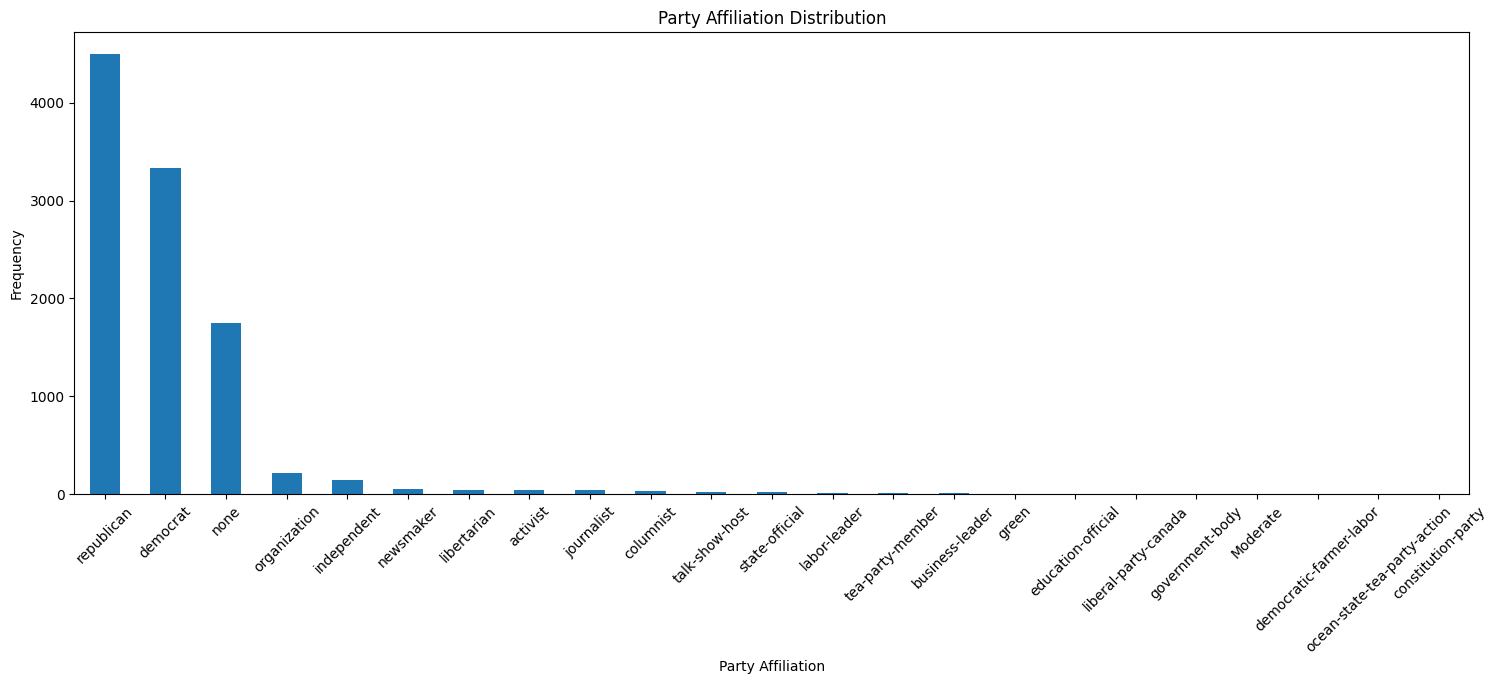

In [15]:
# Frequency distribution of Party Affiliations
party_counts = train_df['Party Affiliation'].value_counts()

# Display frequency counts
print("\nParty Affiliation Counts:")
print(party_counts)

# Visualize Party Affiliation distribution
party_counts.plot(kind='bar', figsize=(18, 6))
plt.title('Party Affiliation Distribution')
plt.xlabel('Party Affiliation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

## Subject Column - One Hot Encoding per subject with multiple subjects per news

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

def get_subject_list(subject_col):
    return subject_col.apply(lambda x: [s.strip() for s in x.split(',')])

def process_subject_column(train_df, test_df, min_freq=150):
    # Split 'Subject' into lists
    train_subject_lists = get_subject_list(train_df['Subject'])
    test_subject_lists = get_subject_list(test_df['Subject'])
    
    # Count subject frequencies in training data
    all_subjects = [subject for subjects in train_subject_lists for subject in subjects]
    subject_counts = pd.Series(all_subjects).value_counts()
    
    # exclude rare subjects
    included_subjects = set(subject_counts[subject_counts >= min_freq].index)
    
    # Function to filter subjects
    def filter_subjects(subject_list):
        return [s for s in subject_list if s in included_subjects]
    
    # Apply the filter
    train_subject_lists = train_subject_lists.apply(filter_subjects)
    test_subject_lists = test_subject_lists.apply(filter_subjects)
    
    # Initialize and fit MultiLabelBinarizer
    mlb = MultiLabelBinarizer(sparse_output=True)
    mlb.fit(train_subject_lists)
    
    # Transform the data
    train_subjects_encoded = mlb.transform(train_subject_lists)
    test_subjects_encoded = mlb.transform(test_subject_lists)
    
    # Convert to DataFrame
    train_subjects_df = pd.DataFrame.sparse.from_spmatrix(train_subjects_encoded, columns=mlb.classes_, index=train_df.index)
    test_subjects_df = pd.DataFrame.sparse.from_spmatrix(test_subjects_encoded, columns=mlb.classes_, index=test_df.index)
    
    return train_subjects_df, test_subjects_df

## Speaker and Party Columns - One-Hot Encoding of prominent (frequently occuring) persons / parties

In [17]:
from sklearn.preprocessing import OneHotEncoder

def process_categorical_column(col: str, train_df: pd.DataFrame, test_df: pd.DataFrame, top_n=5):
    # Get top N
    counts = train_df[col].value_counts()
    top = set(counts.nlargest(top_n).index)
    
    def encode(elem):
        return elem if elem in top else 'Other'
        
    train = train_df[[col]].copy()
    train[col] = train[col].apply(encode)
    
    test = test_df[[col]].copy()
    test[col]= test_df[col].apply(encode)
    # One-Hot Encode
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
    # Fit the encoder on the training data
    # Transform training and test data
    train_encoded = encoder.fit_transform(train[[col]])
    test_encoded = encoder.transform(test[[col]])
    
    # Generate feature names
    feature_names = encoder.get_feature_names_out([col])
    
    # Convert to DataFrame
    train_encoded_df = pd.DataFrame.sparse.from_spmatrix(train_encoded, columns=feature_names, index=train.index)
    test_encoded_df = pd.DataFrame.sparse.from_spmatrix(test_encoded, columns=feature_names, index=test.index)
    
    return train_encoded_df, test_encoded_df

# process_categorical_column('Party Affiliation', train_df, test_df)

## Preprocess Statement and Context data using TF-IDF Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

def process_text(col, train_df, test_df, max_df=0.7, max_features=100):
    """
    Processes a text column by applying TF-IDF vectorization and returns sparse DataFrames.
    
    Parameters:
    - col (str): The column name to process
    - train_df (pd.DataFrame): Training DataFrame
    - test_df (pd.DataFrame): Test DataFrame
    - max_df (float): Maximum document frequency for the TF-IDF Vectorizer
    - max_features (int): Maximum number of features for the TF-IDF Vectorizer
    
    Returns:
    - train (pd.DataFrame): TF-IDF encoded training data
    - test (pd.DataFrame): TF-IDF encoded test data
    """
    tfidf_vectorizer = TfidfVectorizer(
        stop_words='english',
        max_df=max_df,
        max_features=max_features,
        strip_accents='ascii'
    )
    
    # Fit on training data and transform
    train = tfidf_vectorizer.fit_transform(train_df[col])
    test = tfidf_vectorizer.transform(test_df[col])

    # Get feature names
    feature_names = [f"{col}_{feature}" for feature in tfidf_vectorizer.get_feature_names_out()]
    # print(f"TF-IDF Features for '{col}': {feature_names}")

    # Convert to sparse DataFrames
    train = pd.DataFrame.sparse.from_spmatrix(train, columns=feature_names, index=train_df.index)
    test = pd.DataFrame.sparse.from_spmatrix(test, columns=feature_names, index=test_df.index)

    return train, test


# process_text('Context', train_df, test_df)

## Encode the target (ordinal)

In [19]:
def encode_target(train_df, test_df):
    # Define label order
    label_order = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']
    label_mapping = {label: idx for idx, label in enumerate(label_order)}
    
    # Map labels
    train = train_df['Label'].map(label_mapping)
    test = test_df['Label'].map(label_mapping)
    
    return train, test

# encode_target(train_df, test_df)

## Combine into one wide DataFrame

In [52]:
def assemble_features(train_df, test_df):
    # Process subject features
    train_subjects_df, test_subjects_df = process_subject_column(train_df, test_df, min_freq=150)

    # Process speaker and party affiliation as categorical features
    train_speaker_df, test_speaker_df = process_categorical_column('Speaker', train_df, test_df, top_n=5)
    train_party_df, test_party_df = process_categorical_column('Party Affiliation', train_df, test_df, top_n=5)

    # Process text features for 'Statement' and 'Context'
    train_statement_df, test_statement_df = process_text('Statement', train_df, test_df, max_df=0.7, max_features=100)
    train_context_df, test_context_df = process_text('Context', train_df, test_df, max_df=0.7, max_features=50)

    # Encode target labels
    y_train, y_test = encode_target(train_df, test_df)

    # Combine all features into DataFrames - TODO Sparse ? None of the models is actually utilizing memory efficient sparse structures...
    numerical_features = ['Barely True Counts', 'False Counts', 'Half True Counts', 'Mostly True Counts', 'Pants on Fire Counts']
    X_train = pd.concat([
        train_df[numerical_features],
        train_subjects_df.sparse.to_dense(),
        train_speaker_df.sparse.to_dense(),
        train_party_df.sparse.to_dense(),
        train_statement_df.sparse.to_dense(),
        train_context_df.sparse.to_dense()
    ], axis=1)

    X_test = pd.concat([
        test_df[numerical_features],
        test_subjects_df.sparse.to_dense(),
        test_speaker_df.sparse.to_dense(),
        test_party_df.sparse.to_dense(),
        test_statement_df.sparse.to_dense(),
        test_context_df.sparse.to_dense()
    ], axis=1)

    return X_train, X_test, y_train, y_test

In [53]:
X_train, X_test, y_train, y_test = assemble_features(train_df, test_df)
X_train

,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,abortion,campaign-finance,candidates-biography,children,congress,...,Context_statement,Context_television,Context_texas,Context_tv,Context_tweet,Context_union,Context_video,Context_web,Context_website,Context_week
0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70.0,71.0,160.0,163.0,9.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,19.0,3.0,5.0,44.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.0,9.0,20.0,19.0,2.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10236,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10237,4.0,11.0,5.0,3.0,3.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10238,3.0,1.0,3.0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Check Mutual Information

Mutual information measures the dependency between a feature and the target variable, helping identify which features provide the most predictive power.

In [54]:
from sklearn.feature_selection import mutual_info_classif

def calculate_mutual_information(X, y):
    """
    Calculates mutual information between each feature in X and the target y.
    
    Parameters:
    - X (pd.DataFrame): Feature DataFrame
    - y (pd.Series): Target labels
    
    Returns:
    - mi_df (pd.DataFrame): DataFrame of features and their mutual information scores
    """
    # Compute mutual information
    mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

    # Create a DataFrame of scores
    mi_df = pd.DataFrame({
        'Feature': X.columns,
        'Mutual Information': mi_scores
    }).sort_values(by='Mutual Information', ascending=False)
    
    return mi_df

# Calculate mutual information
mi_df = calculate_mutual_information(X_train, y_train)

# Display top features by mutual information
print("Top 10 Features by Mutual Information:")
print(mi_df.head(10))

Top 10 Features by Mutual Information:
                  Feature  Mutual Information
1            False Counts            0.101915
2        Half True Counts            0.100543
3      Mostly True Counts            0.094243
0      Barely True Counts            0.091802
4    Pants on Fire Counts            0.087181
90      Statement_dollars            0.019619
211          Context_week            0.017209
6        campaign-finance            0.017204
81         Statement_cost            0.015566
199        Context_senate            0.014193


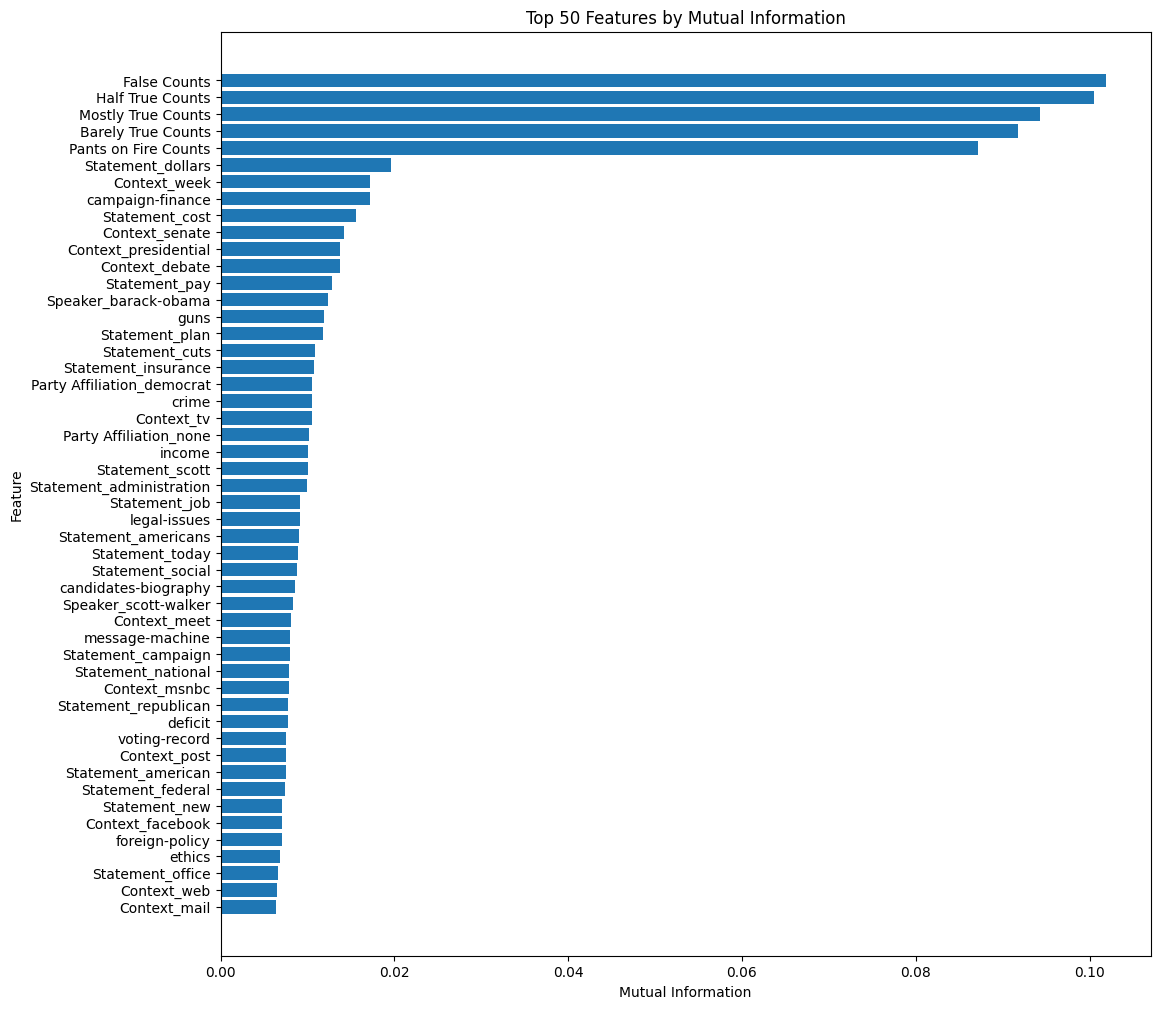

In [43]:
# Plot top 50 features
plt.figure(figsize=(12, 12))
top_features = mi_df.head(50)
plt.barh(top_features['Feature'], top_features['Mutual Information'])
plt.gca().invert_yaxis()  # Invert y-axis to display highest scores at the top
plt.title("Top 50 Features by Mutual Information")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.show()

# Evaluate Different Multi-Classification Models

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Trains, predicts, and evaluates a machine learning model.

    Parameters:
    - model: The machine learning model instance (e.g., RandomForestClassifier()).
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training target.
    - X_test (pd.DataFrame): Test features.
    - y_test (pd.Series): Test target.
    - model_name (str): A string representing the name of the model.

    Outputs:
    - Prints accuracy, classification report, and plots confusion matrix.
    - Returns the trained model and predictions.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return model, y_pred
    
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10238 entries, 0 to 10239
Columns: 212 entries, Barely True Counts to Context_week
dtypes: float64(167), int64(45)
memory usage: 16.6 MB


## Logistic Regression

Logistic Regression
Accuracy: 0.2952
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.21      0.23       208
           1       0.31      0.35      0.33       241
           2       0.30      0.33      0.31       265
           3       0.29      0.22      0.25       212
           4       0.30      0.39      0.34       249
           5       0.38      0.15      0.22        92

    accuracy                           0.30      1267
   macro avg       0.30      0.28      0.28      1267
weighted avg       0.30      0.30      0.29      1267



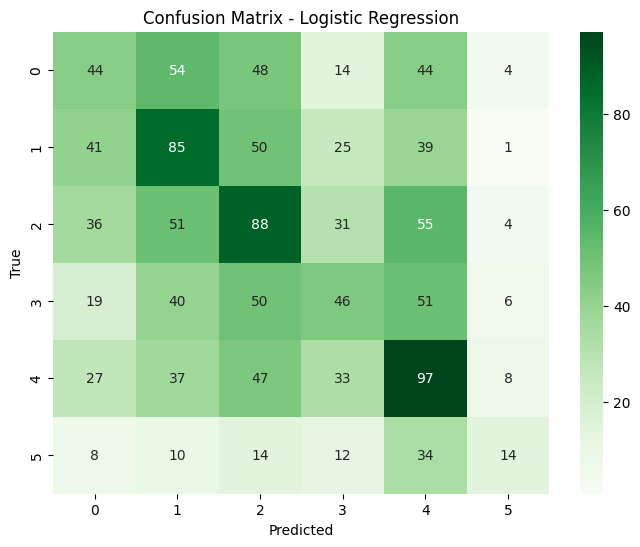

array([2, 4, 4, ..., 4, 1, 4])

In [56]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression(max_iter=10000, solver='lbfgs')

# Train, predict, and evaluate
lr_trained_model, y_pred_lr = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Logistic Regression")
y_pred_lr

## Random Forest Classifier

Random Forest Classifier
Accuracy: 0.4104
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.32      0.36       208
           1       0.38      0.44      0.41       241
           2       0.39      0.42      0.41       265
           3       0.42      0.33      0.37       212
           4       0.41      0.49      0.44       249
           5       0.56      0.49      0.52        92

    accuracy                           0.41      1267
   macro avg       0.43      0.41      0.42      1267
weighted avg       0.41      0.41      0.41      1267



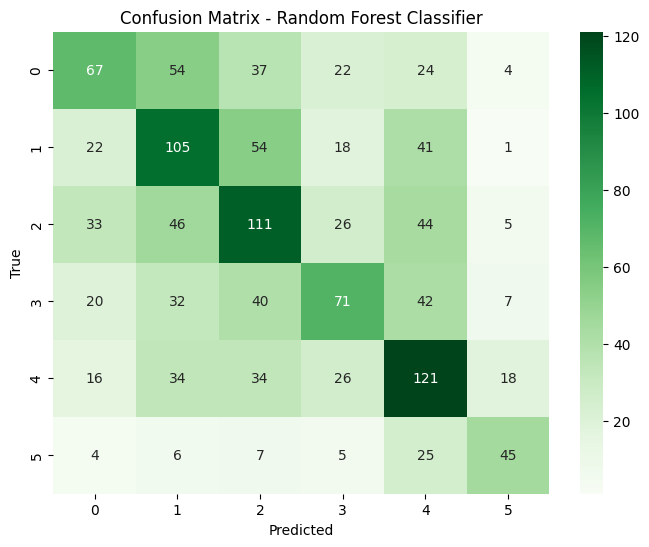

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train, predict, and evaluate
rf_trained_model, y_pred_rf = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest Classifier")

## Support Vector Machine (LinearSVC)

Support Vector Machine (LinearSVC)
Accuracy: 0.3086
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.20      0.23       208
           1       0.31      0.37      0.34       241
           2       0.30      0.33      0.32       265
           3       0.33      0.23      0.27       212
           4       0.31      0.42      0.36       249
           5       0.45      0.18      0.26        92

    accuracy                           0.31      1267
   macro avg       0.33      0.29      0.30      1267
weighted avg       0.31      0.31      0.30      1267



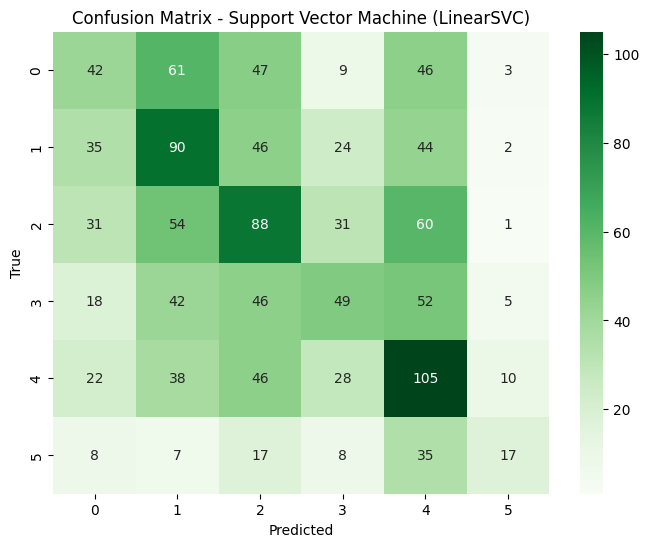

In [58]:
from sklearn.svm import LinearSVC

# Initialize the model
svm_model = LinearSVC(max_iter=20000, random_state=42)

# Train, predict, and evaluate
svm_trained_model, y_pred_svm = train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test, "Support Vector Machine (LinearSVC)")

## Multinomial Naive Bayes

Multinomial Naive Bayes
Accuracy: 0.2920
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.27      0.26       208
           1       0.35      0.28      0.31       241
           2       0.35      0.15      0.22       265
           3       0.23      0.43      0.30       212
           4       0.32      0.27      0.29       249
           5       0.36      0.49      0.42        92

    accuracy                           0.29      1267
   macro avg       0.31      0.32      0.30      1267
weighted avg       0.31      0.29      0.29      1267



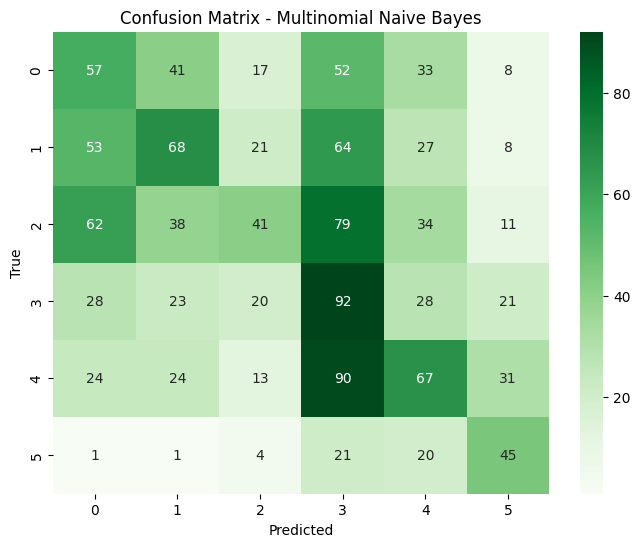

In [59]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb_model = MultinomialNB()

# Train, predict, and evaluate
nb_trained_model, y_pred_nb = train_and_evaluate_model(nb_model, X_train, y_train, X_test, y_test, "Multinomial Naive Bayes")

## XGBoost Classifier

XGBoost Classifier
Accuracy: 0.4301
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.26      0.32       208
           1       0.39      0.47      0.42       241
           2       0.43      0.48      0.45       265
           3       0.45      0.36      0.40       212
           4       0.44      0.50      0.47       249
           5       0.56      0.53      0.54        92

    accuracy                           0.43      1267
   macro avg       0.44      0.43      0.43      1267
weighted avg       0.43      0.43      0.43      1267



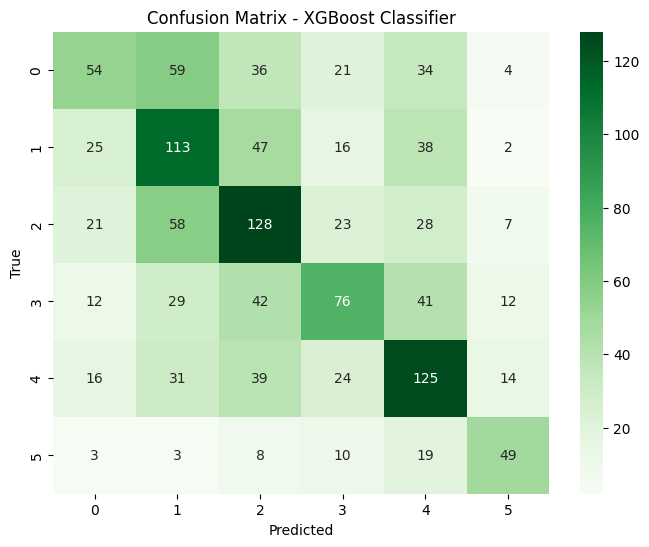

In [60]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Train, predict, and evaluate
xgb_trained_model, y_pred_xgb = train_and_evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost Classifier")

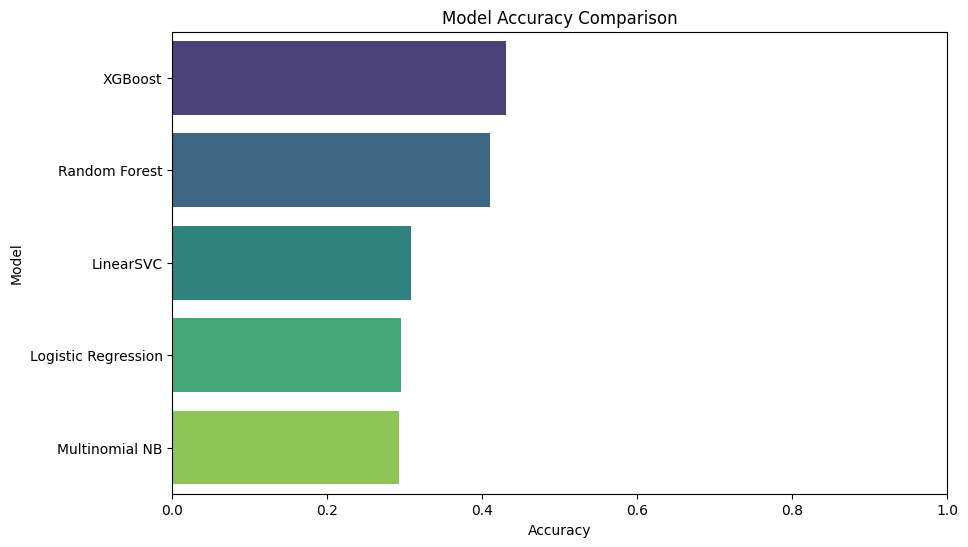

In [61]:
# Collect accuracy scores for all models
model_names = ['Logistic Regression', 'Random Forest', 'LinearSVC', 'Multinomial NB', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_xgb)
]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
}).sort_values(by='Accuracy', ascending=False)

# Plot the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis', hue='Model')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

# Hyperparameter Tuning for XGBoost Classifier

Now that we've identified the XGBoost Classifier as the best-performing model, we'll perform hyperparameter tuning to optimize its performance further. We'll use GridSearchCV with cross-validation to find the best combination of hyperparameters.

In [74]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define Parameter Grid
param_grid = {
    'n_estimators': [60, 80, 100, 120],        # Number of gradient-boosted trees (boosting rounds)
    'max_depth': [3, 4, 5, 6],                 # Maximum depth of a tree (controls model complexity)
    'learning_rate': [0.1, 0.2, 0.3],      # Step size shrinkage used in update
    'reg_lambda': [0.75, 1, 1.25]            # L2 regularization term on weights (prevents overfitting)
}

# Initialize Classifier and CV Strategy

# Initialize the XGBoost classifier
xgb = XGBClassifier(
    eval_metric='mlogloss',   # Evaluation metric for multiclass classification
    random_state=42           # For reproducibility
)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [75]:
# Perform Grid Search

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,     # Use all available cores
    cv=cv,
    verbose=2
)

# Fit the model on the training data (this may take some time)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [60, 80, 100, 12],
                         'reg_lambda': [0.75, 1, 1.25]},
             scoring='accuracy', verbose=2)

In [76]:
# Best Parameters and CV Accuracy

print("Best Parameters Found:")
for param_name in grid_search.best_params_:
    print(f"{param_name}: {grid_search.best_params_[param_name]}")

print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters Found:
learning_rate: 0.2
max_depth: 3
n_estimators: 60
reg_lambda: 1

Best Cross-Validation Accuracy: 0.4480


In [77]:
# Evaluate Best Model on Test Set

# Retrieve the best model
best_xgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy of Best XGBoost Model: {accuracy_best:.4f}")

# Compare with the default model's accuracy
accuracy_default = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy of Default XGBoost Model: {accuracy_default:.4f}")

# Calculate improvement
improvement = accuracy_best - accuracy_default
print(f"Improvement in Accuracy: {improvement:.4f}")

# Display classification report
print("\nClassification Report for Best XGBoost Model:")
print(classification_report(y_test, y_pred_best))

Test Accuracy of Best XGBoost Model: 0.4081
Test Accuracy of Default XGBoost Model: 0.4301
Improvement in Accuracy: -0.0221

Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.55      0.18      0.27       208
           1       0.34      0.48      0.40       241
           2       0.36      0.44      0.39       265
           3       0.50      0.33      0.39       212
           4       0.42      0.53      0.47       249
           5       0.58      0.49      0.53        92

    accuracy                           0.41      1267
   macro avg       0.46      0.41      0.41      1267
weighted avg       0.44      0.41      0.40      1267

